## Logistic Regression for Binary Classification on Handwritten Digits Data

The dataset used in this exercise is MNIST data. Logistic regression is performed for binary classification to label handwritten digits as either '5' or '6'.

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
##Part (a) Read data and confirm number of entries
#Issue with reading data with given code - made updates to use return_X_y instead
data = fetch_openml('mnist_784', version=1, cache=True)

In [3]:
#Get data only for 5s and 6s
data2 = pd.DataFrame(data=data.data)
data2.index = data.target
data_updated = data2[data2.index == '5'].append(data2[data2.index == '6'])

In [4]:
data_updated.head()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
class                                                                           
5         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
class           ...                                                     
5          0.0  ...       0.0       0.0       0.0       0.0       0.0   
5          0.0  ...       0.0       0.0       0.0       0.0       0.0   
5          0.0  ...       0.0       0.0       0.0       0.0       0.0   
5          0.0  ...       0.0       0.0       0.0       0.0       0.0   
5          0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
class                                                    
5           0.0       0.0       0.0       0.0       0.0  
5           0.0       0.0       0.0       0.0       0.0  
5           0.0       0.0       0.0       0.0       0.0  
5           0.0       0.0       0.0       0.0       0.0  
5           0.0       0.0       0.0       0.0       0.0  

[5 rows x 784 columns]

In [6]:
#Get shape of dataframe - (13189 - rows, 784 - columns) 
data_updated.shape

(13189, 784)

In [8]:
##Part (b) Split data 80/20 training to testing
#after scaling the predictors
train_x1, test_x1, train_y, test_y = train_test_split(data_updated.to_numpy(), pd.array(data_updated.index), test_size = 0.2, random_state = 0)

train_x= StandardScaler().fit_transform(train_x1)
test_x= StandardScaler().fit_transform(test_x1)

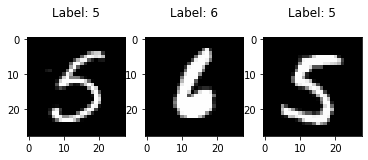

In [9]:
#view a few different training images
plt.figure()
for index, (image, label) in enumerate(zip(train_x1[20:23], train_y[20:23])):
    plt.subplot(1, 3, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Label: %i\n' % int(label))

In [10]:
## Part(c)
# Setting range for scaling paramter
params = np.logspace(-5, 5, 6)
params

array([1.e-05, 1.e-03, 1.e-01, 1.e+01, 1.e+03, 1.e+05])

In [11]:
train, validation = validation_curve(LogisticRegression(solver='newton-cg'), train_x, train_y, "C", params,cv=5)

C:\Users\ytgcl\miniconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=C, param_range=[1.e-05 1.e-03 1.e-01 1.e+01 1.e+03 1.e+05] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [12]:
#Get mean
train_mean = np.mean(train, axis=1)
validation_mean = np.mean(validation, axis=1)

## Search for "optimal" scaling parameter

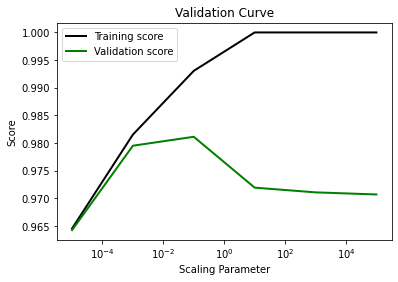

In [13]:
plt.title("Validation Curve")
plt.xlabel("Scaling Parameter")
plt.ylabel("Score")

plt.semilogx(params, train_mean, label="Training score", color="black", lw=2)
plt.semilogx(params, validation_mean, label="Validation score", color="green", lw=2)

plt.legend(loc="best")
plt.show()

#Based on the results from the graph below, we can see 0.1 scaling parameter performs the best with the highest score

## Search for "optimal" regularization parameter

In [15]:
# L1 parameter
L1 = np.logspace(-5, 5, 6)
print(L1)

[1.e-05 1.e-03 1.e-01 1.e+01 1.e+03 1.e+05]


In [16]:
train_2, validation_2 = validation_curve(LogisticRegression(penalty='l1', solver='saga'), train_x, train_y, "C", L1,cv=5)

C:\Users\ytgcl\miniconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=C, param_range=[1.e-05 1.e-03 1.e-01 1.e+01 1.e+03 1.e+05] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\ytgcl\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ytgcl\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ytgcl\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "

In [17]:
#get mean
train_mean_2 = np.mean(train_2, axis=1)
validation_mean_2 = np.mean(validation_2, axis=1)

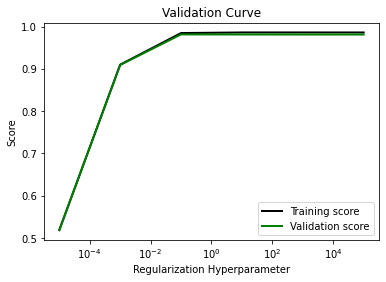

In [18]:
plt.title("Validation Curve")
plt.xlabel("Regularization Hyperparameter")
plt.ylabel("Score")

plt.semilogx(L1, train_mean_2, label="Training score", color="black", lw=2)
plt.semilogx(L1, validation_mean_2, label="Validation score", color="green", lw=2)

plt.legend(loc="best")
plt.show()

#Based on the model, we did not get convergence. However, 0.1 seems to perform the best

In [19]:
##Part (e)
#refit using selected "optimal" parameters
mod_2 = LogisticRegression(C = 0.1, solver = 'newton-cg').fit(train_x, train_y)
mod_3 = LogisticRegression(penalty='l1',C = 0.1, solver = 'saga').fit(train_x, train_y)

C:\Users\ytgcl\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [20]:
#predict based on the 2 logistic regression models
m2 = mod_2.predict(test_x)
m3 = mod_3.predict(test_x)

In [21]:
#accuracy of model from part c
accuracy_score(test_y, m2)

0.979529946929492

In [22]:
#accuracy of model from part d
accuracy_score(test_y, m3)

0.9818043972706596

In [23]:
#Based on the accuracy scores, there is little performance difference between the 2 models - 97% for m2 and 98% for m3 
#There was a convergence issue with m3 which is an indication that the model might not be a great fit for the data.

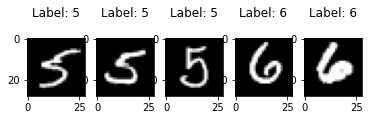

In [24]:
## Part (f)
## Visualize 5 erroneous images (code given from part b)
plt.figure()
for index, (image, label) in enumerate(zip(test_x1[20:25], m2[20:25])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Label: %i\n' % int(label))